In [1]:
import pandas as pd 
import numpy as np 

from tools_tolgay import functions_readfiles as readfiles

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'cm'
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12, 6)
rcParams['figure.dpi'] = 100

In [2]:

runs = {
    # "interpolated_from_luminosity_per_mass_by_dividing_to_4pi_RBFInterpolator_N200": {
        # "base_fdir": "/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_runs/miville_deschenes_2017",
    #     "label": "L/M/4π RBFInterpolator N200",
    #     "file_name": "luminosity_from_luminosity_per_mass_by_dividing_to_4pi_RBFInterpolator_N200_smoothingLength_interpolation.txt",
    #     "color": "magenta",
    # },
    # "expected from flux":{
        # "base_fdir": "/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_runs/miville_deschenes_2017",
    #     "label": "Expected from flux",
    #     "file_name": "luminosity_from_flux_smoothingLength_expected.txt",
    #     "color": "blue",
    # },
    "expected from luminosity per mass by dividing to 4pi":{
        "base_fdir": "/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_runs/miville_deschenes_2017",
        "label": "Original",
        "file_name": "luminosity_from_luminosity_per_mass_by_dividing_to_4pi_smoothingLength_expected.txt",
        "color": "orange",
    },
    "expected from luminosity per mass by dividing to 4pi Z=1":{
        "base_fdir": "/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_runs/miville_deschenes_2017_metallicity1",
        "label": "Z=1",
        "file_name": "luminosity_from_luminosity_per_mass_by_dividing_to_4pi_smoothingLength_expected.txt",
        "color": "red",
    },
    "expected from luminosity per mass by dividing to 4pi Z=2":{
        "base_fdir": "/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_runs/miville_deschenes_2017_metallicity2",
        "label": "Z=2",
        "file_name": "luminosity_from_luminosity_per_mass_by_dividing_to_4pi_smoothingLength_expected.txt",
        "color": "brown",
    },
    "expected from luminosity per mass by dividing to 4pi Z=3":{
        "base_fdir": "/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_runs/miville_deschenes_2017_metallicity3",
        "label": "Z=3",
        "file_name": "luminosity_from_luminosity_per_mass_by_dividing_to_4pi_smoothingLength_expected.txt",
        "color": "purple",
    },
    "expected from luminosity per mass by dividing to 4 pi hdenx20": {
        "base_fdir": "/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_runs/miville_deschenes_2017_hdenx20",
        "label": "hdenx20",
        "file_name": "luminosity_from_luminosity_per_mass_by_dividing_to_4pi_smoothingLength_expected.txt",
        "color": "blue",
    },
    "expected from luminosity per mass by dividing to 4 pi hdenx20 Z=2": {
        "base_fdir": "/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_runs/miville_deschenes_2017_metallicitySet2_hdenx20", 
        "label": "Z=2 hdenx20",
        "file_name": "luminosity_from_luminosity_per_mass_by_dividing_to_4pi_smoothingLength_expected.txt",
        "color": "lime",
    },
    # "expected from luminosity per mass":{
    #     "base_fdir": "/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_runs/miville_deschenes_2017_metallicity1",
    #     "label": "Expected from L/M",
    #     "file_name": "luminosity_from_luminosity_per_mass_smoothingLength_expected.txt",
    #     "color": "green",
    # },
}

for key, value in runs.items():
    
    base_fdir = value["base_fdir"]
    file_name = value["file_name"]

    path_to_file = f"{base_fdir}/{file_name}"
    print(path_to_file)
    data = pd.read_csv(path_to_file, comment="#", sep=",")

    value["data"] = data
    


/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_runs/miville_deschenes_2017/luminosity_from_luminosity_per_mass_by_dividing_to_4pi_smoothingLength_expected.txt
/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_runs/miville_deschenes_2017_metallicity1/luminosity_from_luminosity_per_mass_by_dividing_to_4pi_smoothingLength_expected.txt
/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_runs/miville_deschenes_2017_metallicity2/luminosity_from_luminosity_per_mass_by_dividing_to_4pi_smoothingLength_expected.txt
/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_runs/miville_deschenes_2017_metallicity3/luminosity_from_luminosity_per_mass_by_dividing_to_4pi_smoothingLength_expected.txt
/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_runs/miville_deschenes_2017_hdenx20/luminosity_from_luminosity_per_mass_by_dividing_to_4pi_smoothingLength_expected.txt
/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_runs/miville_deschenes_2017_metallicitySet2_hdenx20/lumin

In [3]:
data.columns

Index(['Cloud', 'Ncomp', 'Npix', 'A', 'l', 'e_l', 'b', 'e_b', 'theta', 'WCO',
       'NH2', 'Sigma', 'vcent', 'sigmav', 'Rmax', 'Rmin', 'Rang', 'Rgal',
       'INF', 'Dn', 'Df', 'zn', 'zf', 'Sn', 'Sf', 'Rn', 'Rf', 'Mn', 'Mf',
       'Lco', 'hden', 'isrf', 'radius', 'turbulence', '12 + log(O/H)',
       'metallicity', 'mass', 'original_hden', 'rudolph_metallicity',
       'smoothing_length', 'log_metallicity', 'log_hden', 'log_turbulence',
       'log_isrf', 'log_smoothing_length', 'L_ly_alpha', 'L_h_alpha',
       'L_h_beta', 'L_co_10', 'L_co_21', 'L_co_32', 'L_co_43', 'L_co_54',
       'L_co_65', 'L_co_76', 'L_co_87', 'L_13co', 'L_c2', 'L_o3_88',
       'L_o3_5006', 'L_o3_4958'],
      dtype='object')

In [4]:
mh = 1.67e-24 * 1.989e33  # Msolar

cm2pc = 3.24078e-19 

alpha_co = 2e20 / (6.3e19)

for key, value in runs.items():
    data = value["data"]
    label = value["label"]
    color = value["color"]

    mu = 1.36 # mean molecular weight

    # if data['INF'] == 0:
    #     distance = data['Dn']
    # elif data['INF'] == 1:
    #     distance = data['Df']

    distance = data['Dn'] * 1e3 # pc 

    # data['column_density_doga'] = data['NH2'] * 2 * mu * mh * (cm2pc)**2  # Msolar / pc2
    mass = data['Sigma'] * distance**2 * data['A'] / mu

    data['Lco_norm'] = mass / alpha_co



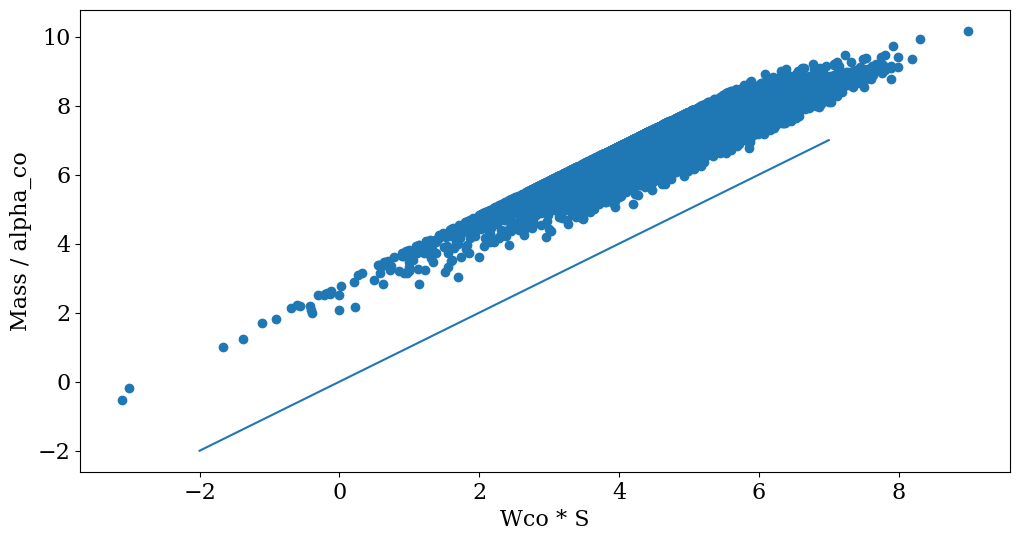

In [5]:
data = runs['expected from luminosity per mass by dividing to 4pi']['data'] 

plt.scatter(
    np.log10(data['Lco']),
    np.log10(data['Lco_norm']),
)
plt.plot(
    [-2, 7],
    [-2, 7],
)

plt.xlabel("Wco * S")
plt.ylabel("Mass / alpha_co")

plt.show()

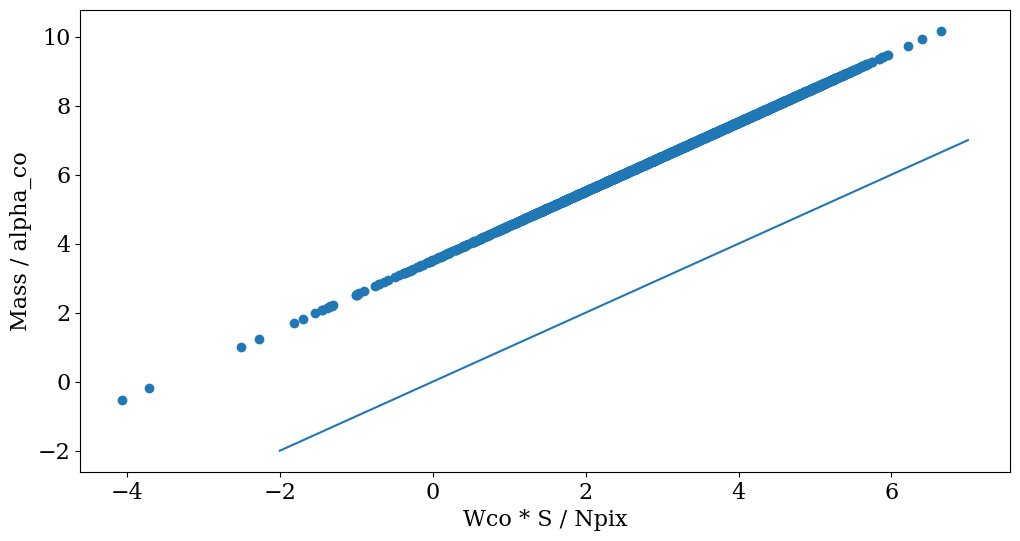

In [6]:
data = runs['expected from luminosity per mass by dividing to 4pi']['data'] 

plt.scatter(
    np.log10(data['Lco']/data['Npix']),
    np.log10(data['Lco_norm']),
)
plt.plot(
    [-2, 7],
    [-2, 7],
)

plt.xlabel("Wco * S / Npix")
plt.ylabel("Mass / alpha_co")

plt.show()

In [7]:
high_metallicity_indices = runs['expected from luminosity per mass by dividing to 4pi']['data']['metallicity'] > 2.5
cloud_ids_with_high_metallicity = runs['expected from luminosity per mass by dividing to 4pi']['data'].loc[high_metallicity_indices, 'Cloud']

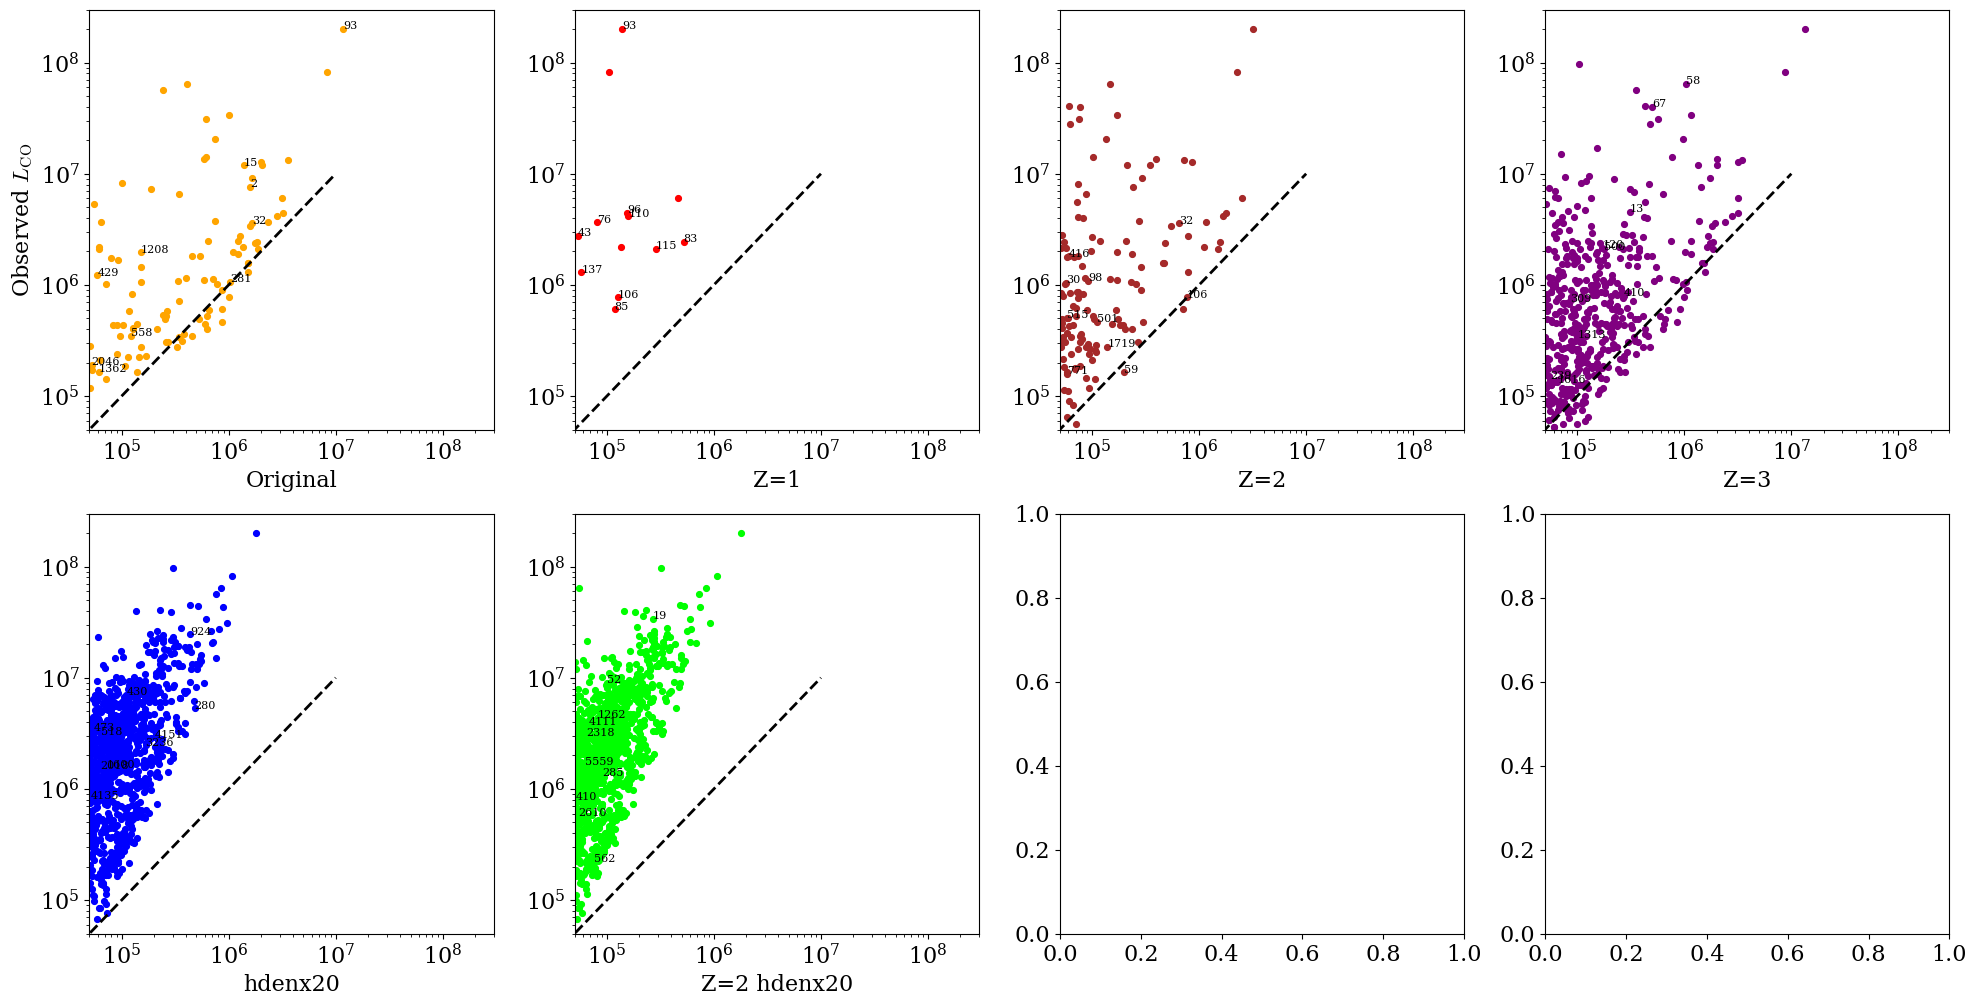

In [8]:
fig, axs = plt.subplots(2, 4, figsize=(24, 12), dpi=100)
axs = axs.flatten()

##### Filtering the rows to plot #####

# high_metallicity_indices = runs['expected from luminosity per mass by dividing to 4pi']['data']['metallicity'] > 2.5
# cloud_ids_with_high_metallicity = runs['expected from luminosity per mass by dividing to 4pi']['data'].loc[high_metallicity_indices, 'Cloud']

# # Pick first 10 id's 
# ids_picked = cloud_ids_with_high_metallicity.iloc[:10].values


##### Plotting #####
for counter, (key, value) in enumerate(runs.items()):

    # Create a mask to filter the data
    # mask = value["data"]['Cloud'].isin(ids_picked)

    data = value["data"].copy()
    label = value["label"]
    color = value["color"]

    condition = (data['Lco'] > 5e4) & (data['Lco'] < 3e8) & (data['L_co_10'] > 5e4) & (data['L_co_10'] < 3e8)
    data = data[condition]

    ax = axs[counter]
    ax.scatter(
        data["L_co_10"], 
        data["Lco"], 
        label=label, 
        color=color,
        lw=2,
        s=10,
    )
    ax.plot(
        [1e2, 1e7], 
        [1e2, 1e7], 
        ls="--", 
        color="black", 
        lw=2, 
        label=r"$y=x$"
    )

    # Select random 10 points to annotate
    random_indices = np.random.choice(data.index, size=10, replace=False)
    for i in random_indices:
        ax.text(
            data["L_co_10"].loc[i],
            data["Lco"].loc[i],
            f"{int(data['Cloud'].loc[i])}",
            fontsize=8,
        )
    # # print the corresponding row for each scatter point
    # for i in range(len(data)):
    #     ax.text(
    #         data["L_co_10"].iloc[i],
    #         data["Lco"].iloc[i],
    #         f"{int(data['Cloud'].iloc[i])}",
    #         fontsize=8,
    #     )

    # ax.legend(frameon=False, fontsize=10, loc="upper right")

    ax.set_xscale("log")
    ax.set_yscale("log")
    if counter == 0:
        # ax.set_ylabel(r"$Miville Deschenes+2017 L_{\mathrm{CO}}$ [K km s$^{-1}$ pc$^2$]")
        ax.set_ylabel(r"Observed $L_{\mathrm{CO}}$")

    ax.set_xlabel(value['label'])
    
    # ax.set_xlim(1e-7, 1e9)
    # ax.set_ylim(1e-7, 1e9)

    ax.set_xlim(5e4, 3e8)
    ax.set_ylim(5e4, 3e8)    

# plt.tight_layout()
plt.show()


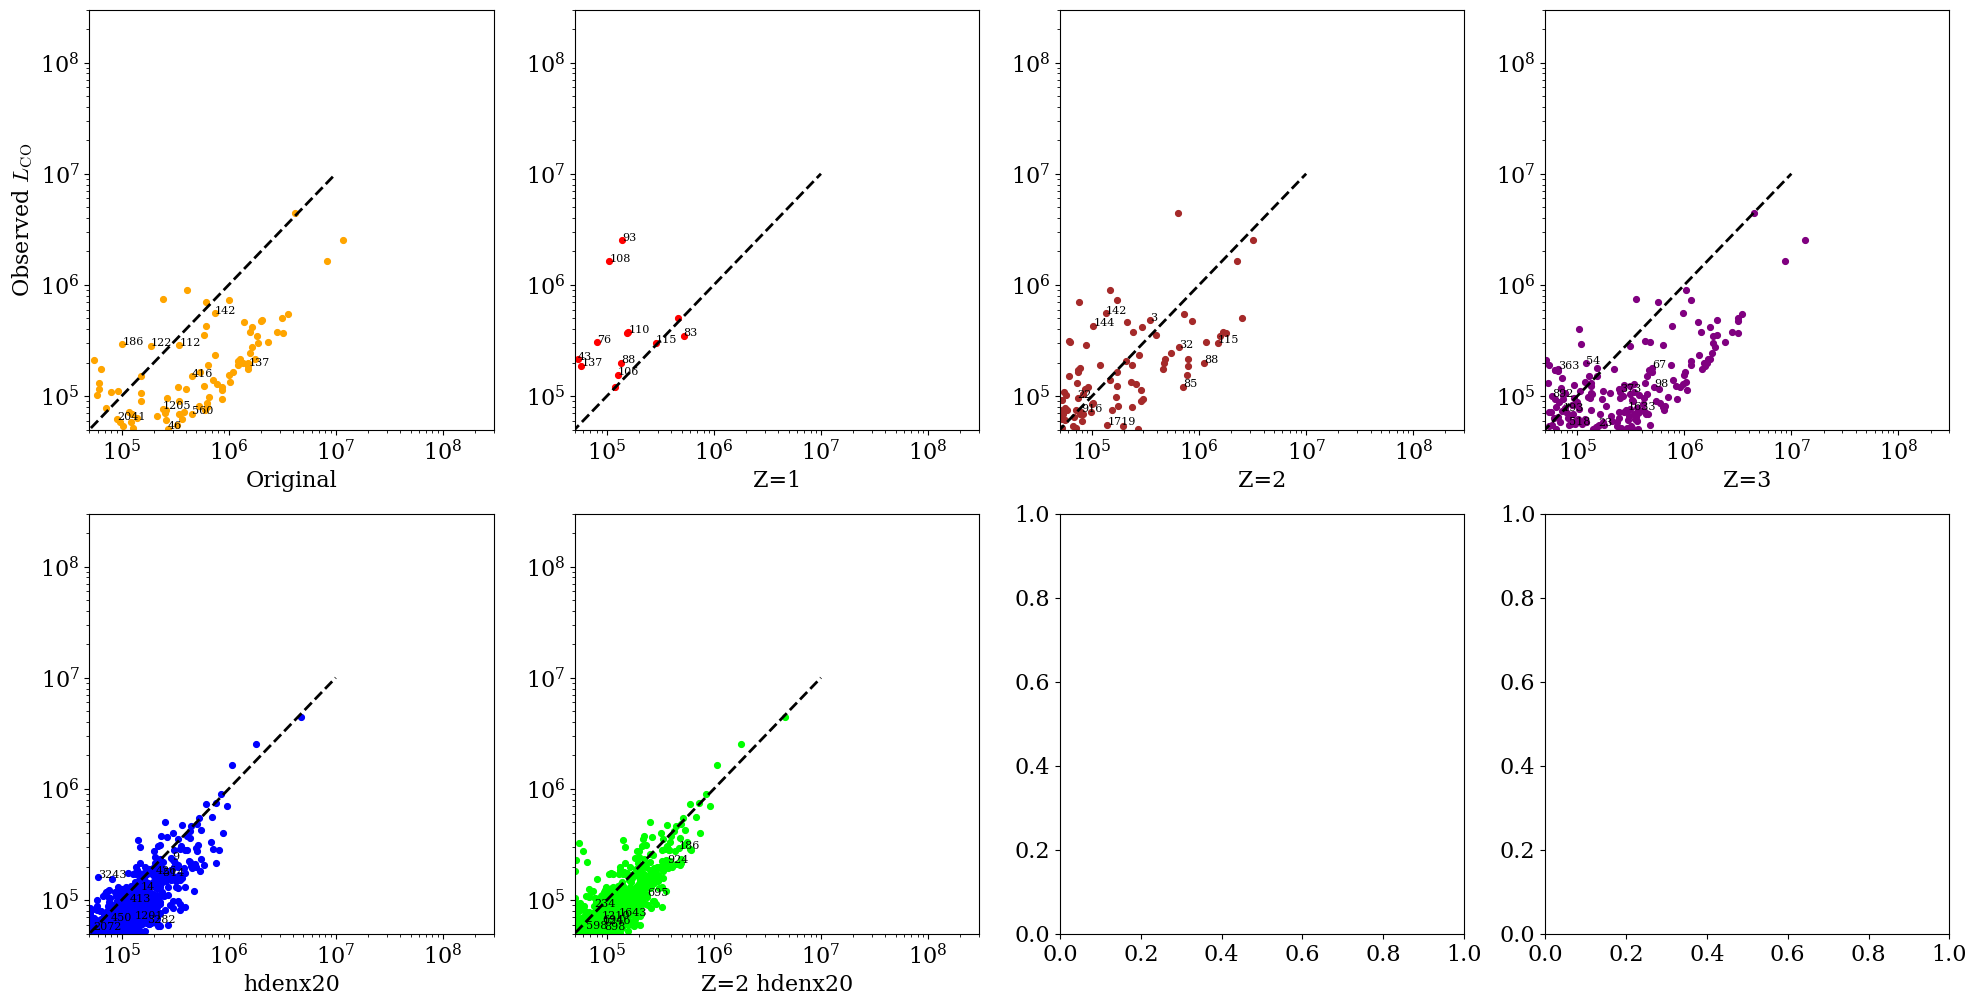

In [9]:
fig, axs = plt.subplots(2, 4, figsize=(24, 12), dpi=100)
axs = axs.flatten()

##### Filtering the rows to plot #####

# high_metallicity_indices = runs['expected from luminosity per mass by dividing to 4pi']['data']['metallicity'] > 2.5
# cloud_ids_with_high_metallicity = runs['expected from luminosity per mass by dividing to 4pi']['data'].loc[high_metallicity_indices, 'Cloud']

# # Pick first 10 id's 
# ids_picked = cloud_ids_with_high_metallicity.iloc[:10].values


##### Plotting #####
for counter, (key, value) in enumerate(runs.items()):

    # Create a mask to filter the data
    # mask = value["data"]['Cloud'].isin(ids_picked)

    data = value["data"].copy()
    data['Lco'] /= data['Npix']
    label = value["label"]
    color = value["color"]

    condition = (data['Lco'] > 5e4) & (data['Lco'] < 3e8) & (data['L_co_10'] > 5e4) & (data['L_co_10'] < 3e8)
    data = data[condition]

    ax = axs[counter]
    ax.scatter(
        data["L_co_10"], 
        data["Lco"], 
        label=label, 
        color=color,
        lw=2,
        s=10,
    )
    ax.plot(
        [1e2, 1e7], 
        [1e2, 1e7], 
        ls="--", 
        color="black", 
        lw=2, 
        label=r"$y=x$"
    )

    # Select random 10 points to annotate
    random_indices = np.random.choice(data.index, size=10, replace=False)
    for i in random_indices:
        ax.text(
            data["L_co_10"].loc[i],
            data["Lco"].loc[i],
            f"{int(data['Cloud'].loc[i])}",
            fontsize=8,
        )
    # # print the corresponding row for each scatter point
    # for i in range(len(data)):
    #     ax.text(
    #         data["L_co_10"].iloc[i],
    #         data["Lco"].iloc[i],
    #         f"{int(data['Cloud'].iloc[i])}",
    #         fontsize=8,
    #     )

    # ax.legend(frameon=False, fontsize=10, loc="upper right")

    ax.set_xscale("log")
    ax.set_yscale("log")
    if counter == 0:
        # ax.set_ylabel(r"$Miville Deschenes+2017 L_{\mathrm{CO}}$ [K km s$^{-1}$ pc$^2$]")
        ax.set_ylabel(r"Observed $L_{\mathrm{CO}}$")

    ax.set_xlabel(value['label'])
    
    # ax.set_xlim(1e-7, 1e9)
    # ax.set_ylim(1e-7, 1e9)

    ax.set_xlim(5e4, 3e8)
    ax.set_ylim(5e4, 3e8)    

# plt.tight_layout()
plt.show()


      Cloud        hden  metallicity  turbulence  isrf     radius  \
82       83  424.226626     2.831065   15.383660   1.0   25.90810   
135     136  107.535038     3.058247   15.369320   1.0   40.83435   
2461   2462    2.030283     0.709207    5.995620   1.0  141.65810   
4118   4119    5.305916     1.967172    7.044016   1.0   63.87326   
5558   5559    5.925954     2.162325    9.202229   1.0   50.56780   

               Lco       L_co_10  
82    2.447742e+06  1.831834e+06  
135   1.321362e+07  3.614636e+06  
2461  4.142443e+07  1.193871e-02  
4118  6.803143e+06  1.541856e+02  
5558  1.648063e+06  8.287380e+01  
      Cloud         hden  metallicity  turbulence  isrf     radius  \
82       83  8484.532516     2.831065   15.383660   1.0   25.90810   
135     136  2150.700759     3.058247   15.369320   1.0   40.83435   
2461   2462    40.605652     0.709207    5.995620   1.0  141.65810   
4114   4119   106.118325     1.967172    7.044016   1.0   63.87326   
5546   5559   118.519071 

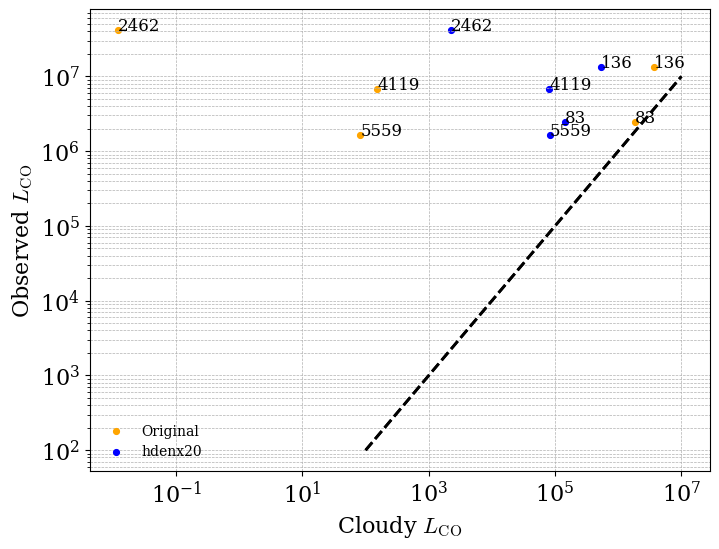

In [10]:
# clouds_of_interest = [136, 83, 2462, 4119, 5559]
clouds_of_interest = [136, 83, 2462, 4119, 5559]
printing_column_names = ['Cloud', 'hden', 'metallicity', 'turbulence', 'isrf', 'radius', 'Lco', 'L_co_10']

fig, axs = plt.subplots(1, 1, figsize=(8, 6), dpi=100)

keys_to_plot = [
    "expected from luminosity per mass by dividing to 4pi",
    # "expected from luminosity per mass by dividing to 4pi Z=1",
    # "expected from luminosity per mass by dividing to 4pi Z=2",
    # "expected from luminosity per mass by dividing to 4pi Z=3",
    "expected from luminosity per mass by dividing to 4 pi hdenx20",
    # "expected from luminosity per mass by dividing to 4 pi hdenx20 Z=1",
    # "expected from luminosity per mass by dividing to 4 pi hdenx20 Z=2",
    # "expected from luminosity per mass by dividing to 4 pi hdenx20 Z=3",
]

for key, value in runs.items():

    if key not in keys_to_plot:
        continue

    data = value["data"].copy()
    label = value["label"]
    color = value["color"]

    # Get the clouds with id's specified in clouds_of_interest
    condition = data['Cloud'].isin(clouds_of_interest)
    data = data[condition]

    if key in ["expected from luminosity per mass by dividing to 4pi", "expected from luminosity per mass by dividing to 4 pi hdenx20"]:
        print(data[printing_column_names])
    
    # Plotting 
    ax = axs
    ax.scatter(
        data["L_co_10"], 
        data["Lco"], 
        label=label, 
        color=color,
        lw=2,
        s=10,
    )
    ax.plot(
        [1e2, 1e7], 
        [1e2, 1e7], 
        ls="--", 
        color="black", 
        lw=2, 
        # label=r"$y=x$"
    )

    # Annotate the points with cloud id
    for i in range(len(data)):
        ax.text(
            data["L_co_10"].iloc[i],
            data["Lco"].iloc[i],
            f"{int(data['Cloud'].iloc[i])}",
            fontsize=12,
        )

    ax.legend(frameon=False, fontsize=10)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel(r"Observed $L_{\mathrm{CO}}$")
    ax.set_xlabel(r"Cloudy $L_{\mathrm{CO}}$")
    ax.grid(True, which="both", ls="--", lw=0.5)


plt.show()

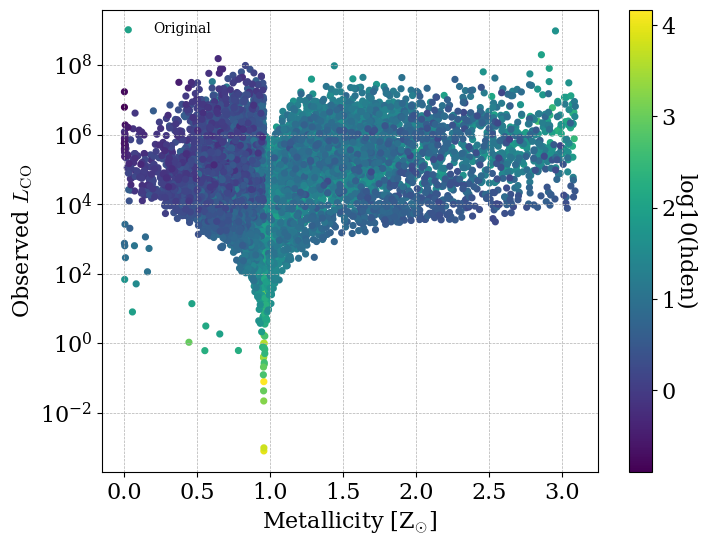

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(8, 6), dpi=100)

data = runs['expected from luminosity per mass by dividing to 4pi']['data'].copy()
# condition = (data['Lco'] > 5e4) & (data['Lco'] < 3e8) & (data['L_co_10'] > 5e4) & (data['L_co_10'] < 3e8)
# data = data[condition]

ax = axs 
mappable = ax.scatter(
    data["metallicity"], 
    data["Lco"], 
    label="Original", 
    c=np.log10(data['hden']),
    lw=2,
    s=10,
)
cbar = plt.colorbar(mappable, ax=ax)
# ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"Observed $L_{\mathrm{CO}}$")
ax.set_xlabel(r"Metallicity [Z$_{\odot}$]")
cbar.set_label('log10(hden)', rotation=270, labelpad=15)
# ax.plot(
#     [1e2, 1e7], 
#     [1e2, 1e7], 
#     ls="--", 
#     color="black", 
#     lw=2, 
#     label=r"$y=x$"
# )
ax.legend(frameon=False, fontsize=10)
# ax.set_xlim(5e4, 3e8)
# ax.set_ylim(5e4, 3e8)    
ax.grid(True, which="both", ls="--", lw=0.5)



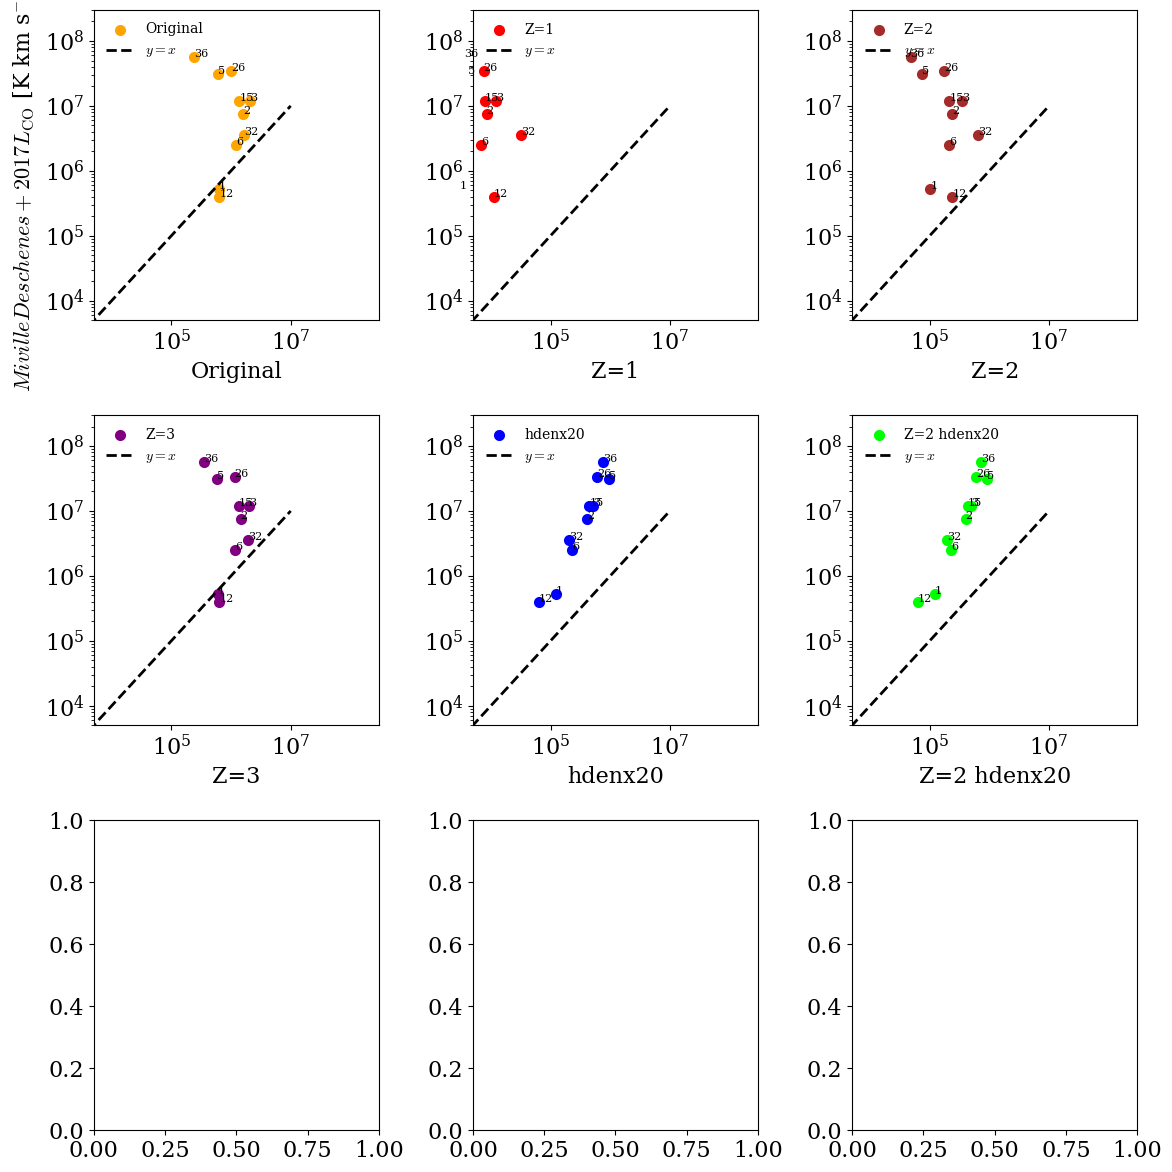

In [12]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12), dpi=100)
axs = axs.flatten()

##### Filtering the rows to plot #####

high_metallicity_indices = runs['expected from luminosity per mass by dividing to 4pi']['data']['metallicity'] > 2.5
cloud_ids_with_high_metallicity = runs['expected from luminosity per mass by dividing to 4pi']['data'].loc[high_metallicity_indices, 'Cloud']

# Pick first 10 id's 
ids_picked = cloud_ids_with_high_metallicity.iloc[:10].values


##### Plotting #####
for counter, (key, value) in enumerate(runs.items()):

    # Create a mask to filter the data
    mask = value["data"]['Cloud'].isin(ids_picked)

    data = value["data"].loc[mask].copy()           # choose by index labels
    label = value["label"]
    color = value["color"]
    
    ax = axs[counter]
    ax.scatter(
        data["L_co_10"], 
        data["Lco"], 
        label=label, 
        color=color,
        lw=2,
    )
    ax.plot(
        [1e2, 1e7], 
        [1e2, 1e7], 
        ls="--", 
        color="black", 
        lw=2, 
        label=r"$y=x$"
    )

    # print the corresponding row for each scatter point
    for i in range(len(data)):
        ax.text(
            data["L_co_10"].iloc[i],
            data["Lco"].iloc[i],
            f"{int(data['Cloud'].iloc[i])}",
            fontsize=8,
        )

    ax.legend(frameon=False, fontsize=10, loc="upper left")

    ax.set_xscale("log")
    ax.set_yscale("log")
    if counter == 0:
        ax.set_ylabel(r"$Miville Deschenes+2017 L_{\mathrm{CO}}$ [K km s$^{-1}$ pc$^2$]")

    ax.set_xlabel(value['label'])
    
    # ax.set_xlim(1e-7, 1e9)
    # ax.set_ylim(1e-7, 1e9)

    ax.set_xlim(5e3, 3e8)
    ax.set_ylim(5e3, 3e8)    

plt.tight_layout()
plt.show()


In [13]:
cloud_ids_ = [36]

for key, value in runs.items():

    mask = value["data"]['Cloud'].isin(cloud_ids_).copy()
    value['filtered_data'] = value["data"].loc[mask]
    value['filtered_data']['log_ratio'] = np.log10(value['filtered_data']['Lco'] / value['filtered_data']['L_co_10'])

for key, value in runs.items():
    print(f"{key}:")
    print(value['filtered_data'][['log_ratio', 'hden', 'metallicity', 'turbulence', 'isrf', 'radius', 'Lco', 'L_co_10']])

expected from luminosity per mass by dividing to 4pi:
    log_ratio       hden  metallicity  turbulence  isrf    radius  \
35   2.368776  40.127929     2.777608    7.787967   1.0  57.07293   

             Lco        L_co_10  
35  5.646091e+07  241530.422758  
expected from luminosity per mass by dividing to 4pi Z=1:
    log_ratio       hden  metallicity  turbulence  isrf    radius  \
35   4.199258  40.127929          1.0    7.787967   1.0  57.07293   

             Lco      L_co_10  
35  5.646091e+07  3568.535409  
expected from luminosity per mass by dividing to 4pi Z=2:
    log_ratio       hden  metallicity  turbulence  isrf    radius  \
35   3.074265  40.127929          2.0    7.787967   1.0  57.07293   

             Lco       L_co_10  
35  5.646091e+07  47586.356423  
expected from luminosity per mass by dividing to 4pi Z=3:
    log_ratio       hden  metallicity  turbulence  isrf    radius  \
35   2.200487  40.127929          3.0    7.787967   1.0  57.07293   

             Lco  

/tmp/ipykernel_4139917/929728073.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value['filtered_data']['log_ratio'] = np.log10(value['filtered_data']['Lco'] / value['filtered_data']['L_co_10'])
/tmp/ipykernel_4139917/929728073.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value['filtered_data']['log_ratio'] = np.log10(value['filtered_data']['Lco'] / value['filtered_data']['L_co_10'])
/tmp/ipykernel_4139917/929728073.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [14]:
# print the index of the cloud with cloud id 
cloud_id__ = 36
for index, row in runs['expected from luminosity per mass by dividing to 4pi']['data'].iterrows():
    if row['Cloud'] == cloud_id__:
        print(f"Index of cloud id {cloud_id__} is {index}")
        break


Index of cloud id 36 is 35


In [17]:
# fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=100)
# axs = axs.flatten()

# for counter, (key, value) in enumerate(runs.items()):
#     data = value["data"].copy()
#     label = value["label"]
#     color = value["color"]
    
#     ax = axs[counter]
#     ax.scatter(
#         data["L_co_10"], 
#         data["Lco"], 
#         label=label, 
#         color=color,
#         lw=2,
#     )
#     ax.plot(
#         [1e-2, 1e7], 
#         [1e-2, 1e7], 
#         ls="--", 
#         color="black", 
#         lw=2, 
#         label=r"$y=x$"
#     )

#     ax.set_xscale("log")
#     ax.set_yscale("log")
#     if counter == 0:
#         ax.set_ylabel(r"$Miville Deschenes+2017 L_{\mathrm{CO}}$ [K km s$^{-1}$ pc$^2$]")

#     ax.set_xlabel(value['label'])
    
#     ax.set_xlim(1e-2, 1e9)
#     ax.set_ylim(1e-2, 1e9)

# plt.show()


In [16]:
for key, values in runs.items():
    deschenes_total_Lco = np.sum(values['data']['Lco'].copy())
    my_total_Lco = np.sum(values['data']['L_co_10'].copy())

    print(f"{key}:")
    print(f"    Miville Deschenes+2017 total Lco = {deschenes_total_Lco:.3e} K km s^-1 pc^2")
    print(f"    My total Lco = {my_total_Lco:.3e} K km s^-1 pc^2")
    print("\n\n")



############## Dividing Lco to Npix ##############

print(" -------------- After dividing Lco to Npix ------------- ")
for key, values in runs.items():
    deschenes_total_Lco = np.sum(values['data']['Lco'].copy()/values['data']['Npix'].copy())
    my_total_Lco = np.sum(values['data']['L_co_10'])

    print(f"{key}:")
    print(f"    Miville Deschenes+2017 total Lco = {deschenes_total_Lco:.3e} K km s^-1 pc^2")
    print(f"    My total Lco = {my_total_Lco:.3e} K km s^-1 pc^2")
    print("\n\n")

expected from luminosity per mass by dividing to 4pi:
    Miville Deschenes+2017 total Lco = 1.078e+10 K km s^-1 pc^2
    My total Lco = 9.718e+07 K km s^-1 pc^2



expected from luminosity per mass by dividing to 4pi Z=1:
    Miville Deschenes+2017 total Lco = 1.063e+10 K km s^-1 pc^2
    My total Lco = 3.672e+06 K km s^-1 pc^2



expected from luminosity per mass by dividing to 4pi Z=2:
    Miville Deschenes+2017 total Lco = 1.063e+10 K km s^-1 pc^2
    My total Lco = 4.657e+07 K km s^-1 pc^2



expected from luminosity per mass by dividing to 4pi Z=3:
    Miville Deschenes+2017 total Lco = 1.063e+10 K km s^-1 pc^2
    My total Lco = 1.733e+08 K km s^-1 pc^2



expected from luminosity per mass by dividing to 4 pi hdenx20:
    Miville Deschenes+2017 total Lco = 1.063e+10 K km s^-1 pc^2
    My total Lco = 1.763e+08 K km s^-1 pc^2



expected from luminosity per mass by dividing to 4 pi hdenx20 Z=2:
    Miville Deschenes+2017 total Lco = 1.063e+10 K km s^-1 pc^2
    My total Lco = 1.97

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(14, 6), dpi=100)
axs = axs.flatten()

for counter, (key, value) in enumerate(runs.items()):
    # data = value["data"].iloc[600:650]
    data = value["data"].iloc[0:15]
    label = value["label"]
    color = value["color"]
    
    ax = axs[counter]
    ax.scatter(
        data["L_co_10"], 
        data["Lco"], 
        label=label, 
        color=color,
        lw=2,
    )
    ax.plot(
        [1e-2, 1e7], 
        [1e-2, 1e7], 
        ls="--", 
        color="black", 
        lw=2, 
        label=r"$y=x$"
    )

    ax.set_xscale("log")
    ax.set_yscale("log")
    if counter == 0:
        ax.set_ylabel(r"$Miville Deschenes+2017 L_{\mathrm{CO}}$ [K km s$^{-1}$ pc$^2$]")

    # print the corresponding row for each scatter point
    for i in range(len(data)):
        ax.text(data["L_co_10"].iloc[i], data["Lco"].iloc[i], f"{i}", fontsize=10)

    ax.set_xlabel(value['label'])
    
    ax.set_xlim(1e-2, 1e9)
    ax.set_ylim(1e-2, 1e9)

plt.show()


In [ ]:
for key, value in runs.items():
    print(f"{key}:")
    print(f"{sum(value['data']['L_co_10']):.2e} -- {sum(value['data']['Lco']):.2e}")
    print("\n\n")

In [ ]:
cloud_ids = []